In [1]:
##displays all outputs of each cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
##read files
nhl2021 = pd.read_csv('NHLTeamStats2021-22.csv')
nhl2022 = pd.read_csv('NHLTeamStats2022-23.csv')
nhl2023 = pd.read_csv('NHLTeamStats2023-24.csv')

##adding season to data
nhl2021['Season'] = '2021-22'
nhl2022['Season'] = '2022-23'
nhl2023['Season'] = '2023-24'

##combine data
nhldata = pd.concat([nhl2021, nhl2022, nhl2023])

##formating columns
nhldata['Team'] = nhldata['Unnamed: 1']
nhldata = nhldata.drop(columns = 'Unnamed: 1')
nhldata

,Rk,AvAge,GP,W,L,OL,PTS,PTS%,GF,GA,...,SHA,PIM/G,oPIM/G,S,S%,SA,SV%,SO,Season,Team
0,1,27.8,82,58,18,6,122,0.744,337,242,...,8,10.1,10.8,3062,11.0,2515,0.904,5,2021-22,Florida Panthers*
1,2,28.2,82,56,19,7,119,0.726,308,232,...,5,9.0,10.4,2874,10.7,2625,0.912,7,2021-22,Colorado Avalanche*
2,3,28.3,82,54,20,8,116,0.707,277,200,...,3,9.2,7.7,2798,9.9,2310,0.913,6,2021-22,Carolina Hurricanes*
3,4,28.4,82,54,21,7,115,0.701,312,252,...,4,8.6,8.5,2835,11.0,2511,0.900,7,2021-22,Toronto Maple Leafs*
4,5,29.4,82,53,22,7,113,0.689,305,249,...,5,10.8,10.8,2666,11.4,2577,0.903,3,2021-22,Minnesota Wild*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,28,26.7,82,30,36,16,76,0.463,232,281,...,12,10.2,10.0,2269,10.2,2738,0.897,2,2023-24,Montreal Canadiens
28,29,26.8,82,27,43,12,66,0.402,234,298,...,6,8.2,7.6,2458,9.5,2822,0.894,1,2023-24,Columbus Blue Jackets
29,30,27.7,82,27,50,5,59,0.360,203,293,...,5,13.5,10.9,2194,9.3,2666,0.890,1,2023-24,Anaheim Ducks
30,31,27.4,82,23,53,6,52,0.317,178,289,...,8,8.7,9.3,2153,8.3,2681,0.892,1,2023-24,Chicago Blackhawks


In [15]:
##calculating mean of stats grouped by team and season
nhl_teams = nhldata[['Team', 'GF', 'GA', 'S', 'SA']].groupby('Team').mean()
nhl_seasons = nhldata[['Season', 'GF', 'GA', 'S', 'SA']].groupby('Season').mean()

<Axes: xlabel='Team'>

Text(0.5, 1.0, '2021-2024 NHL Teams')

Text(0.5, 0, 'Team')

Text(0, 0.5, 'Mean')

<Axes: xlabel='Season'>

Text(0.5, 1.0, '2021-2024 NHL Seasons')

Text(0.5, 0, 'Season')

Text(0, 0.5, 'Mean')

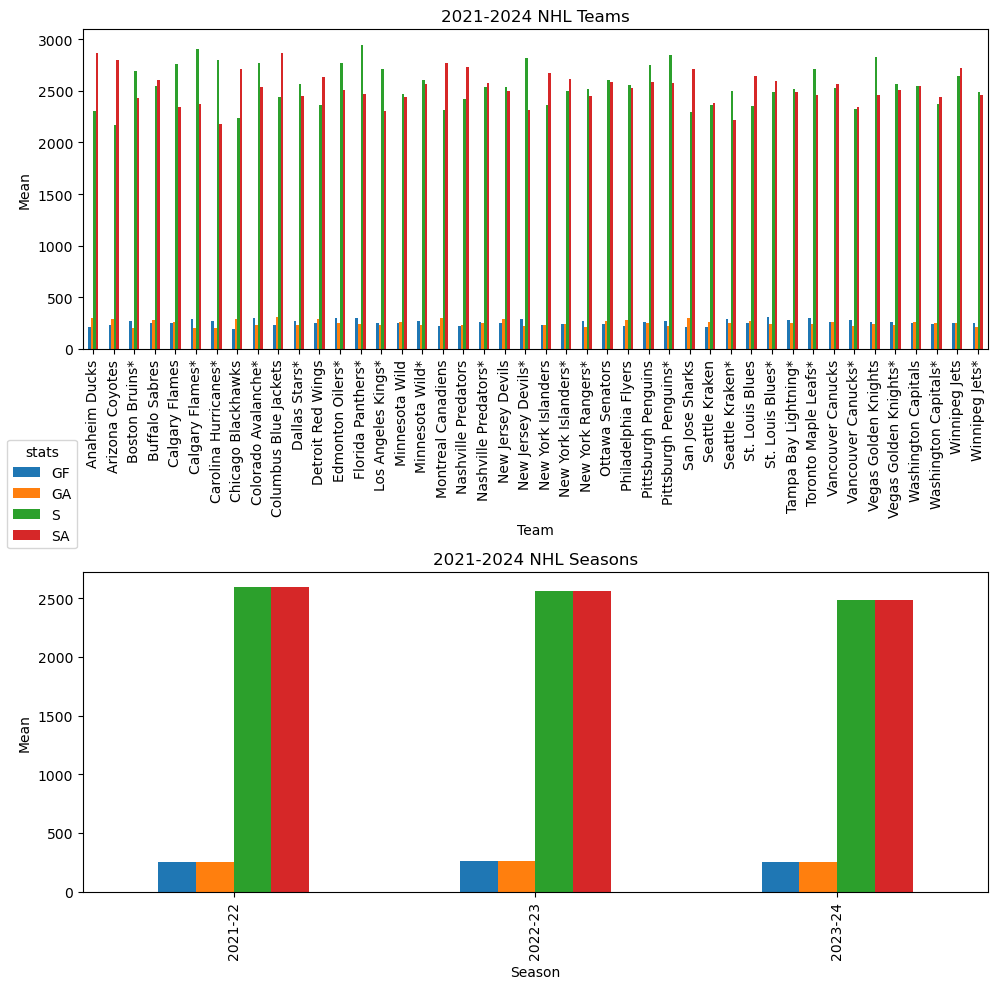

In [31]:
fig, axes = plt.subplots(2, 1, figsize = (10, 10))

##Team based bar plot
nhl_teams.plot(kind = 'bar', ax = axes[0], legend = False)
axes[0].set_title('2021-2024 NHL Teams')
axes[0].set_xlabel('Team')
axes[0].set_ylabel('Mean')

nhl_seasons.plot(kind = 'bar', ax = axes[1], legend = False)
axes[1].set_title('2021-2024 NHL Seasons')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Mean')

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc = 'center left', title = 'stats')

plt.tight_layout()

In [32]:
fig.savefig('NHLTeamSeasonChart.pdf')